                 mean     stdev
optimizer                      
HRP          0.054100  0.039954
markowitz    0.020253  0.016700
NCO         -0.066727  0.360630
Risk Parity -0.002904  0.011159


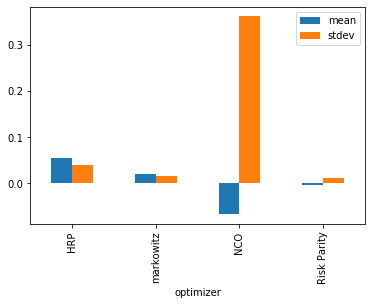

In [4]:
import numpy as np
import pandas as pd

from mcos import optimizer
from mcos import observation_simulator
from mcos import mcos
from mcos.error_estimator import ExpectedOutcomeErrorEstimator, SharpeRatioErrorEstimator, \
    VarianceErrorEstimator
from mcos.covariance_transformer import DeNoiserCovarianceTransformer, AbstractCovarianceTransformer
from mcos.observation_simulator import AbstractObservationSimulator, MuCovLedoitWolfObservationSimulator, \
MuCovObservationSimulator
from pypfopt.expected_returns import mean_historical_return
from pypfopt.risk_models import sample_cov

import warnings
warnings.filterwarnings('ignore')

# Create dataframe of price history to use for expected returns and covariance
def prices_df() -> pd.DataFrame:
    tickers = ['goog','baba', 'amzn', 'wmt', 'glpi', 'bac', 'uaa', 'shld', 'jpm', 'sbux', 'amd', 'aapl','bby',
              'ge', 'rrc', 'ma','fb']
    total_df = pd.DataFrame()
    for id in tickers:
        temp = pd.read_csv( id + '.us.txt', parse_dates=True, index_col='Date')
        temp = pd.DataFrame(temp['Close']).rename(columns={"Close":id})
        if total_df.empty:
            total_df = temp
        else:
            total_df = total_df.join(temp)

    return total_df

# Choose the number of simulations to run
num_sims = 50

# Select the optimizers that you would like to compare
op = [optimizer.HRPOptimizer(), optimizer.MarkowitzOptimizer(),optimizer.NCOOptimizer(), optimizer.RiskParityOptimizer()]

# select the metric to use for comparison
ee = ExpectedOutcomeErrorEstimator()

# select your optional covariance transformer
cov_trans = DeNoiserCovarianceTransformer()

# convert price history to expected returns and covariance matrix
mu = mean_historical_return(prices_df()).values
cov = sample_cov(prices_df()).values

# select your observational simulator
obs_sim = MuCovObservationSimulator(mu, cov, num_sims)

# Run the simulation
results = mcos.simulate_optimizations(obs_sim, num_sims, op, ee, [cov_trans])
print(results)
results.plot.bar()


                 mean     stdev
optimizer                      
HRP          0.004639  0.002122
markowitz    0.004266  0.001855
NCO          0.045889  0.035224
Risk Parity  0.000273  0.000224


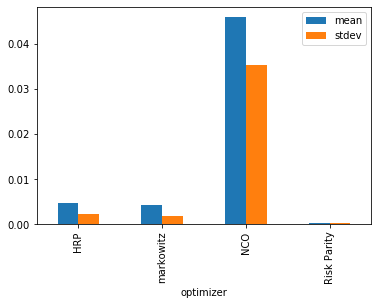

In [5]:
ee = VarianceErrorEstimator()
results = mcos.simulate_optimizations(obs_sim, num_sims, op, ee, [cov_trans])
print(results)
results.plot.bar()

                 mean     stdev
optimizer                      
HRP          0.823336  0.396339
markowitz    0.457998  0.336647
NCO          0.296357  1.300468
Risk Parity -0.122985  0.772149


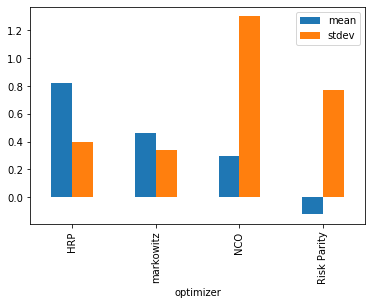

In [6]:
ee = SharpeRatioErrorEstimator()
results = mcos.simulate_optimizations(obs_sim, num_sims, op, ee, [cov_trans])
print(results)
results.plot.bar()